In [3]:
import jar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [4]:
with open('xv_genres.pickle','rb') as read_file:
    df = pickle.load(read_file)

In [5]:
with open('page_16_25v3.pickle', 'rb') as read_file:
    df2 = pickle.load(read_file)

In [172]:
df = pd.concat([df,df2])

In [6]:
with open('page_26_35v3.pickle', 'rb') as read_file:
    df3 = pickle.load(read_file)

In [7]:
with open('page_36_100v3.pickle', 'rb') as read_file:
    df4 = pickle.load(read_file)

In [8]:
df = pd.concat([df,df2, df3, df4])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10019 entries, 13 Days: The Cuban Missile Crisis to Dollars to Donuts
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   link                 10019 non-null  object 
 1   rank                 10019 non-null  object 
 2   desc                 10019 non-null  object 
 3   geek                 10019 non-null  float64
 4   rating               10019 non-null  float64
 5   num_voters           10019 non-null  int64  
 6   price                10019 non-null  object 
 7   average              10019 non-null  object 
 8   avgweight            10019 non-null  object 
 9   baverage             10019 non-null  object 
 10  maxplayers           10018 non-null  float64
 11  maxplaytime          10018 non-null  float64
 12  minage               10018 non-null  float64
 13  minplayers           10018 non-null  float64
 14  minplaytime          10018 non-null  float64
 1

In [10]:
df.iloc[:, 1] = df.iloc[:, 1].astype(float)
df.iloc[:,9]=df.iloc[:,9].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10019 entries, 13 Days: The Cuban Missile Crisis to Dollars to Donuts
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   link                 10019 non-null  object 
 1   rank                 10019 non-null  float64
 2   desc                 10019 non-null  object 
 3   geek                 10019 non-null  float64
 4   rating               10019 non-null  float64
 5   num_voters           10019 non-null  int64  
 6   price                10019 non-null  object 
 7   average              10019 non-null  object 
 8   avgweight            10019 non-null  object 
 9   baverage             10019 non-null  float64
 10  maxplayers           10018 non-null  float64
 11  maxplaytime          10018 non-null  float64
 12  minage               10018 non-null  float64
 13  minplayers           10018 non-null  float64
 14  minplaytime          10018 non-null  float64
 1

In [12]:
df['genres'] = df['genres'].replace(['null, Thematic'],'Thematic')

In [333]:
df.genres.value_counts()

Overall                        3318
War                            1704
Strategy                       1323
Family                         1030
Thematic                        535
Abstract                        354
Strategy , Family               326
Party                           309
Thematic, Strategy              191
Children's                      143
Customizable                    123
War , Thematic                  113
Party , Family                  103
Abstract , Family                89
Thematic, Family                 76
War , Strategy                   72
Children's , Family              55
Abstract , Strategy              32
Thematic, Party                  27
Customizable, Strategy           23
War , Customizable               14
Customizable, Thematic           13
War , Thematic, Strategy          6
Strategy , Party                  5
War , Abstract                    5
Children's , Party                4
Children's , Abstract             4
War , Family                

In [13]:
df['genres'] = df['genres'].replace(['Overall'],None)

In [13]:
df.genres.value_counts()

War                            3057
Strategy                       1672
Family                         1411
Thematic                        706
Abstract                        646
Strategy , Family               449
Party                           421
Thematic, Strategy              256
Children's                      239
Customizable                    199
War , Thematic                  181
Party , Family                  150
Abstract , Family               126
War , Strategy                  102
Thematic, Family                100
Children's , Family              86
Abstract , Strategy              42
Thematic, Party                  35
Customizable, Strategy           29
War , Customizable               25
Customizable, Thematic           17
War , Abstract                   14
Strategy , Party                  9
War , Thematic, Strategy          8
War , Family                      7
Children's , Party                6
Children's , Abstract             5
War , Children's            

In [14]:
len(df.genres.value_counts())

AttributeError: 'DataFrame' object has no attribute 'strategy'

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='genres', ylabel='Density'>

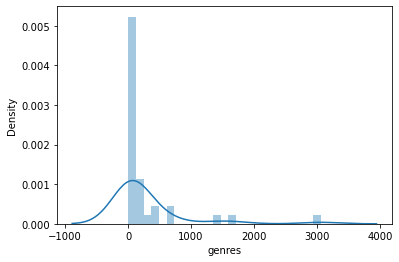

In [15]:
sns.distplot(df.genres.value_counts())

In [14]:
df['strategy_war'] = np.where(df['genres'].str.contains('Strategy') | df['genres'].str.contains('War'), 1, 0)

In [15]:
df['strategy'] = np.where(df['genres'].str.contains('Strategy'), 1, 0)

In [16]:
df['family'] = np.where(df['genres'].str.contains('Family'), 1, 0)

In [17]:
df['thematic'] = np.where(df['genres'].str.contains('Thematic'), 1, 0)
df['war'] = np.where(df['genres'].str.contains('War'), 1, 0)
df['party'] = np.where(df['genres'].str.contains('Party'), 1, 0)
df['abstract'] = np.where(df['genres'].str.contains('Abstract'), 1, 0)

In [341]:
df.sample(20)

,link,rank,desc,geek,rating,num_voters,price,average,avgweight,baverage,...,genres,designer,publish,strategy_war,strategy,family,thematic,war,party,abstract
Cranium Scribblish,/boardgame/82610/cranium-scribblish,6113.0,Cranium Scribblish\n(2009),5.625,6.26,333,/boardgame/82610/cranium-scribblish/marketplac...,6.2579,1,5.62468,...,Party,Brian Weinstock,"Cranium, Inc.",0,0,0,0,0,1,0
Glasgow,/boardgame/301716/glasgow,6259.0,Glasgow\n(2020)\n\n\n\t\t\tEvery move is an op...,5.619,7.50,108,/boardgame/301716/glasgow/marketplace/geekmarket,7.50105,2.2,5.61931,...,War,Mandela Fernandez-Grandon,Lookout Games,1,0,0,0,1,0,0
Basilica,/boardgame/38931/basilica,3600.0,Basilica\n(2010),5.793,6.57,594,/boardgame/38931/basilica/marketplace/geekmarket,6.56756,2.3077,5.79261,...,Strategy,\u0141ukasz M. Pogoda,Rebel Sp. z o.o.,1,1,0,0,0,0,0
Farmerama,/boardgame/120305/farmerama,6799.0,Farmerama\n(2012),5.603,6.18,272,/boardgame/120305/farmerama/marketplace/geekma...,6.17879,2.0952,5.60284,...,"Strategy , Family",Uwe Rosenberg,Ravensburger Spieleverlag GmbH,1,1,1,0,0,0,0
La Granja: No Siesta,/boardgame/195528/la-granja-no-siesta,1416.0,La Granja: No Siesta\n(2016)\n\n\n\t\t\tCollec...,6.290,6.89,1921,/boardgame/195528/la-granja-no-siesta/marketpl...,6.89406,2.1562,6.29001,...,"Strategy , Family","Andreas \""ode.\"" Odendahl",ADC Blackfire Entertainment GmbH,1,1,1,0,0,0,0
Beyond Balderdash,/boardgame/1544/beyond-balderdash,1285.0,Beyond Balderdash\n(1993)\n\n\n\t\t\tDivine th...,6.348,6.83,2897,/boardgame/1544/beyond-balderdash/marketplace/...,6.82869,1.4732,6.34804,...,Party,Laura Robinson,Canada Games,0,0,0,0,0,1,0
StreetSoccer,/boardgame/3421/streetsoccer,2255.0,StreetSoccer\n(2002)\n\n\n\t\t\tControl a 5-a-...,6.022,6.53,1588,/boardgame/3421/streetsoccer/marketplace/geekm...,6.53185,1.5407,6.02230,...,Family,Corn\u00e9 van Moorsel,Cwali,0,0,1,0,0,0,0
"Solomons Campaign: Air, Land, and Sea Warfare, Pacific 1942",/boardgame/8258/solomons-campaign-air-land-and...,9791.0,"Solomons Campaign: Air, Land, and Sea Warfare,...",5.549,7.39,50,/boardgame/8258/solomons-campaign-air-land-and...,7.39,3.8333,5.54887,...,War,Jim Dunnigan,"SPI (Simulations Publications, Inc.)",1,0,0,0,1,0,0
Space Hulk: Death Angel – The Card Game,/boardgame/71721/space-hulk-death-angel-card-game,606.0,Space Hulk: Death Angel – The Card Game\n(2010...,6.781,6.99,11931,/boardgame/71721/space-hulk-death-angel-card-g...,6.98984,2.4127,6.78144,...,Thematic,Corey Konieczka,Fantasy Flight Games,0,0,0,1,0,0,0
The Nightmare Before Christmas TCG,/boardgame/18579/nightmare-christmas-tcg,9106.0,The Nightmare Before Christmas TCG\n(2005),5.557,6.62,90,/boardgame/18579/nightmare-christmas-tcg/marke...,6.62333,2,5.55715,...,Customizable,Andrew Parks,NECA,0,0,0,0,0,0,0


In [410]:
with open('coded_genres.pickle', 'wb') as to_write:
    pickle.dump(df, to_write)

In [241]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [343]:
full_prices = df[df.price_mkt > 0]

In [344]:
full_prices.corr()

,rank,geek,rating,num_voters,baverage,maxplayers,maxplaytime,minage,minplayers,minplaytime,...,stddev,usersrated,views,strategy_war,strategy,family,thematic,war,party,abstract
rank,1.000000,-0.816449,-0.380996,-0.399525,-0.816454,0.019608,0.021569,-0.166315,0.041300,0.065054,...,0.241858,-0.399536,-0.435788,0.042759,-0.323753,-0.129407,-0.137167,0.383769,-0.029267,0.076015
geek,-0.816449,1.000000,0.478796,0.654424,1.000000,-0.015484,-0.016876,0.180092,-0.077313,-0.045455,...,-0.181835,0.654442,0.717151,0.023594,0.323597,0.040040,0.121669,-0.309759,-0.002635,-0.064026
rating,-0.380996,0.478796,1.000000,0.213282,0.478816,-0.045127,0.090770,0.169161,-0.254835,0.149195,...,-0.050796,0.213296,0.314410,0.226156,0.131107,-0.226043,0.076686,0.128937,-0.092671,-0.073447
num_voters,-0.399525,0.654424,0.213282,1.000000,0.654419,-0.000176,-0.010912,0.056617,0.000719,-0.049209,...,-0.067962,1.000000,0.814349,-0.017578,0.147451,0.075156,0.037050,-0.175885,0.019161,-0.020422
baverage,-0.816454,1.000000,0.478816,0.654419,1.000000,-0.015485,-0.016860,0.180095,-0.077319,-0.045447,...,-0.181848,0.654436,0.717153,0.023606,0.323604,0.040029,0.121665,-0.309753,-0.002638,-0.064017
maxplayers,0.019608,-0.015484,-0.045127,-0.000176,-0.015485,1.000000,-0.002508,-0.027150,0.047644,-0.038206,...,0.049294,-0.000171,-0.010368,-0.051392,-0.021734,0.038677,-0.008173,-0.037061,0.124588,-0.022821
maxplaytime,0.021569,-0.016876,0.090770,-0.010912,-0.016860,-0.002508,1.000000,0.035131,-0.007912,0.066026,...,-0.027177,-0.010913,-0.002336,0.038394,-0.018334,-0.028048,-0.009095,0.064368,-0.011490,-0.011987
minage,-0.166315,0.180092,0.169161,0.056617,0.180095,-0.027150,0.035131,1.000000,-0.022720,0.081527,...,0.166483,0.056618,0.151198,0.168438,0.229400,-0.222637,0.161180,-0.034875,-0.018261,-0.077738
minplayers,0.041300,-0.077313,-0.254835,0.000719,-0.077319,0.047644,-0.007912,-0.022720,1.000000,-0.030007,...,0.013459,0.000712,-0.069078,-0.081098,0.003783,0.020954,-0.106067,-0.093818,0.295551,-0.012509
minplaytime,0.065054,-0.045455,0.149195,-0.049209,-0.045447,-0.038206,0.066026,0.081527,-0.030007,1.000000,...,0.141802,-0.049214,0.012760,0.252755,-0.028576,-0.196655,-0.000644,0.326341,-0.098368,-0.096542


In [411]:
with open('prices_only.pickle', 'wb') as to_write:
    pickle.dump(full_prices, to_write)

In [329]:
lr_full = LinearRegression()

X = full_prices[['price_mkt', 'avgweight', 'strategy', 'abstract', 'family', 'minage', 'minplaytime', 'ten_productive_designers']] #loc[:, 'X1':'X6'] 
#better to not do range, might miss features
# Target
y = full_prices['rating']

# Fit  
lr_full.fit(X, y)

# Score
lr_full.score(X, y)

0.3319964080144767

In [108]:
df.designer.value_counts().head(20)

Reiner Knizia        185
(Uncredited)         175
Dean Essig            70
Richard H. Berg       68
Martin Wallace        67
Bruno Cathala         56
Klaus Teuber          53
Friedemann Friese     51
Michael Schacht       45
Uwe Rosenberg         45
Alan R. Moon          44
James Ernest          44
Andrew Looney         41
Inka Brand            41
Wolfgang Kramer       41
Michael Kiesling      40
R\u00fcdiger Dorn     39
Mike Elliott          38
Frank Chadwick        36
Prospero Hall         34
Name: designer, dtype: int64

In [18]:
designer_df = df.groupby('designer').mean()

In [107]:
designer_df.columns

Index(['rank', 'geek', 'rating', 'num_voters', 'baverage', 'maxplayers',
       'maxplaytime', 'minage', 'minplayers', 'minplaytime', 'numcomments',
       'numfans', 'numgeeklists', 'numhasparts', 'numowned', 'numplays',
       'numplays_month', 'numprevowned', 'numtrading', 'numwanting',
       'numwantparts', 'numweights', 'numwish', 'numwishlistcomments',
       'price_mkt', 'stddev', 'usersrated', 'views', 'strategy_war',
       'strategy', 'family', 'thematic', 'war', 'party', 'abstract'],
      dtype='object')

In [19]:
designer_rank= designer_df.sort_values('rank')

In [20]:
designer_rank.price_mkt

designer
Dane Beltrami             119.950
Morten Monrad Pedersen     44.500
Adam Poots                190.000
James A. Wilson            63.705
Chris Cantrell            234.465
                           ...   
Harald Bilz                45.000
Jonathan Thwaites          44.000
Joey Turco                    NaN
Taiju Sawada                  NaN
Phillip Falcon Perry          NaN
Name: price_mkt, Length: 3663, dtype: float64

In [22]:
designer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3663 entries, (Uncredited) to zombie homer
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 3663 non-null   float64
 1   geek                 3663 non-null   float64
 2   rating               3663 non-null   float64
 3   num_voters           3663 non-null   float64
 4   baverage             3663 non-null   float64
 5   maxplayers           3663 non-null   float64
 6   maxplaytime          3663 non-null   float64
 7   minage               3663 non-null   float64
 8   minplayers           3663 non-null   float64
 9   minplaytime          3663 non-null   float64
 10  numcomments          3663 non-null   float64
 11  numfans              3663 non-null   float64
 12  numgeeklists         3663 non-null   float64
 13  numhasparts          3663 non-null   float64
 14  numowned             3663 non-null   float64
 15  numplays             366

In [102]:
with open('designer_df.pickle', 'wb') as to_write:
    pickle.dump(designer_df, to_write)

In [21]:
designer_rank_part = designer_df[['rank', 'geek', 'rating', 'avgweight', 'num_voters', 'baverage', 'maxplayers',
       'maxplaytime', 'minage', 'minplayers', 'minplaytime', 'numcomments',
       'numfans', 'numgeeklists', 'numowned', 'numplays',
       'numplays_month', 'numtrading', 'numwanting',
       'numwantparts', 'numweights', 'numwish',
       'price_mkt', 'views', 'strategy_war',
       'strategy', 'family', 'thematic', 'war', 'party', 'abstract']]

KeyError: "['avgweight'] not in index"

In [23]:
designer_rank_part['numdes']= df.designer.value_counts()

<ipython-input-23-03c72634b0f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  designer_rank_part['numdes']= df.designer.value_counts()


In [351]:
designer_rank_part

,rank,rating,geek,usersrated,views,strategy_war,strategy,family,thematic,war,party,abstract,price_mkt,maxplayers,maxplaytime,minage,minplayers,minplaytime,numdes
designer,,,,,,,,,,,,,,,,,,,
(Uncredited),6282.982857,6.593886,5.732629,1042.017143,77616.342857,0.331429,0.12,0.308571,0.051429,0.222857,0.108571,0.240000,38.461282,8.331429,46.497143,8.342857,2.228571,41.068571,175
A. B. J. Lawson,7795.000000,6.030000,5.579000,275.000000,57693.000000,0.000000,0.00,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,8.000000,30.000000,10.000000,3.000000,30.000000,1
A. E. Goodwin,9399.000000,7.600000,5.554000,45.000000,31619.000000,1.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,4.000000,720.000000,12.000000,2.000000,720.000000,1
A. Eddie Goldfarb,6360.000000,6.120000,5.616000,353.000000,66810.000000,0.000000,0.00,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,4.000000,45.000000,6.000000,2.000000,45.000000,1
A. J. Porfirio,1749.000000,7.265000,6.238000,2163.500000,206061.500000,0.000000,0.00,0.000000,1.000000,0.000000,0.000000,0.000000,38.790000,1.000000,20.000000,14.000000,1.000000,20.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ginkgo,2956.000000,8.035000,5.946500,435.500000,88283.000000,1.000000,0.50,0.000000,0.000000,0.500000,0.000000,0.000000,52.455000,4.000000,52.500000,12.000000,2.000000,37.500000,2
jim pinto,2505.000000,6.820000,5.966000,825.000000,129241.000000,1.000000,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,6.000000,120.000000,12.000000,2.000000,120.000000,1
team SAIEN,6968.000000,6.653333,5.656667,242.333333,34635.333333,0.333333,0.00,0.333333,0.333333,0.333333,0.000000,0.333333,NaN,3.000000,21.666667,8.666667,2.333333,18.333333,3


In [24]:
designer_rank_part = designer_rank_part.sort_values('rank').reset_index()

In [353]:
designer_rank_part.loc[designer_rank_part.numdes > 5].sort_values(by='rank')

,designer,rank,rating,geek,usersrated,views,strategy_war,strategy,family,thematic,war,party,abstract,price_mkt,maxplayers,maxplaytime,minage,minplayers,minplaytime,numdes
81,Mac Gerdts,719.636364,7.470000,6.844000,5752.000000,4.936758e+05,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,56.381000,5.090909,115.454545,12.363636,2.090909,88.181818,11
96,Corey Konieczka,844.500000,7.384286,6.942357,10329.285714,1.215121e+06,0.285714,0.285714,0.071429,0.857143,0.000000,0.0,0.000000,119.536875,4.500000,154.285714,12.928571,1.714286,102.142857,14
115,Jamey Stegmaier,939.166667,7.528333,7.066500,15514.500000,1.631159e+06,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,68.495000,21.166667,81.666667,12.333333,1.333333,65.833333,6
135,Hjalmar Hach,1078.333333,7.395000,6.615000,5080.500000,3.144997e+05,0.000000,0.000000,0.500000,0.333333,0.000000,0.0,0.333333,47.315000,4.833333,52.500000,11.000000,1.666667,34.166667,6
139,S\u00e9bastien Pauchon,1114.500000,7.035000,6.563333,8493.166667,3.540185e+05,0.500000,0.500000,0.833333,0.166667,0.000000,0.0,0.000000,34.150000,4.000000,45.000000,9.000000,1.833333,38.333333,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,Irad B. Hardy,8411.333333,6.595556,5.571889,131.888889,4.361944e+04,1.000000,0.111111,0.000000,0.000000,1.000000,0.0,0.000000,NaN,2.555556,316.666667,12.222222,1.888889,263.333333,9
3074,N\u00e9stor Romeral Andr\u00e9s,8433.666667,7.095556,5.576000,99.111111,2.065200e+04,0.000000,0.000000,0.111111,0.000000,0.000000,0.0,1.000000,NaN,2.333333,25.555556,7.888889,2.111111,20.000000,9
3092,Ed Teixeira,8477.500000,7.065000,5.576667,139.833333,8.726683e+04,0.833333,0.000000,0.000000,0.166667,0.833333,0.0,0.166667,NaN,4.333333,99.166667,11.666667,1.166667,69.166667,6
3101,Kurt Martin,8496.428571,7.841429,5.570000,56.571429,3.462029e+04,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,69.890000,2.571429,175.714286,12.000000,2.000000,175.714286,7


In [25]:
designer_rank_part.head()

,designer,rank,geek,rating,num_voters,baverage,maxplayers,maxplaytime,minage,minplayers,...,price_mkt,views,strategy_war,strategy,family,thematic,war,party,abstract,numdes
0,Dane Beltrami,5.0,8.221,8.69,11926.0,8.22085,6.0,480.0,14.0,3.0,...,119.950,1913608.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1
1,Morten Monrad Pedersen,21.0,7.914,8.09,26482.0,7.91374,6.0,90.0,13.0,1.0,...,44.500,1257766.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,Adam Poots,35.0,7.796,8.70,7232.0,7.79584,4.0,180.0,17.0,1.0,...,190.000,4199900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,James A. Wilson,38.0,7.758,8.07,15434.0,7.75846,4.0,80.0,13.0,1.0,...,63.705,1372484.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1
4,Chris Cantrell,39.0,7.756,8.06,13360.0,7.75593,4.0,120.0,14.0,2.0,...,234.465,1664898.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1


In [194]:
df.reset_index()

,index,link,rank,desc,geek,rating,num_voters,price,average,avgweight,...,genres,designer,publish,strategy_war,strategy,family,thematic,war,party,abstract
0,13 Days: The Cuban Missile Crisis,/boardgame/177590/13-days-cuban-missile-crisis,590.0,13 Days: The Cuban Missile Crisis\n(2016)\n\n\...,6.791,7.35,3570,/boardgame/177590/13-days-cuban-missile-crisis...,7.34614,2.3592,...,"War , Strategy",Asger Harding Granerud,Jolly Roger Games,1,1,0,0,1,0,0
1,1775: Rebellion,/boardgame/128996/1775-rebellion,352.0,1775: Rebellion\n(2013)\n\n\n\t\t\tFour sides ...,7.032,7.69,3583,/boardgame/128996/1775-rebellion/marketplace/g...,7.68780,2.2458,...,War,Beau Beckett,"Academy Games, Inc.",1,0,0,0,1,0,0
2,1812: The Invasion of Canada,/boardgame/94246/1812-invasion-canada,826.0,1812: The Invasion of Canada\n(2012)\n\n\n\t\t...,6.603,7.36,2172,/boardgame/94246/1812-invasion-canada/marketpl...,7.35633,2.1765,...,"War , Strategy",Beau Beckett,"Academy Games, Inc.",1,1,0,0,1,0,0
3,1830: Railways & Robber Barons,/boardgame/421/1830-railways-robber-barons,184.0,1830: Railways & Robber Barons\n(1986)\n\n\n\t...,7.291,7.88,4563,/boardgame/421/1830-railways-robber-barons/mar...,7.88440,4.1625,...,Strategy,Francis Tresham,The Avalon Hill Game Co,1,1,0,0,0,0,0
4,1846: The Race for the Midwest,/boardgame/17405/1846-race-midwest,453.0,1846: The Race for the Midwest\n(2005)\n\n\n\t...,6.929,7.96,2020,/boardgame/17405/1846-race-midwest/marketplace...,7.95666,4.0085,...,Strategy,Thomas Lehmann,"Deep Thought Games, LLC",1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,Ascension X: War of Shadows,/boardgame/200456/ascension-x-war-shadows,2496.0,Ascension X: War of Shadows\n(2016),5.968,7.63,454,/boardgame/200456/ascension-x-war-shadows/mark...,7.63277,2.1667,...,"Strategy , Family",Gary Arant,Stone Blade Entertainment,1,1,1,0,0,0,0
2515,Camel Up Cards,/boardgame/192947/camel-cards,2497.0,Camel Up Cards\n(2016),5.968,6.70,999,/boardgame/192947/camel-cards/marketplace/geek...,6.70080,1.7222,...,"Strategy , Family",Steffen Bogen,999 Games,1,1,1,0,0,0,0
2516,Nefarious,/boardgame/108044/nefarious,2498.0,Nefarious\n(2011),5.968,6.31,2346,/boardgame/108044/nefarious/marketplace/geekma...,6.30865,1.7365,...,Family,Donald X. Vaccarino,Ascora Games,0,0,1,0,0,0,0
2517,Dilluvia Project,/boardgame/139245/dilluvia-project,2499.0,Dilluvia Project\n(2015)\n\n\n\t\t\tDevelop th...,5.968,7.25,538,/boardgame/139245/dilluvia-project/marketplace...,7.25294,3.7073,...,Strategy,Alexandre Garcia,Spielworxx,1,1,0,0,0,0,0


In [463]:
df.rename(index = {'index':'game'})

,link,rank,desc,geek,rating,num_voters,price,average,avgweight,baverage,...,designer,publish,strategy_war,strategy,family,thematic,war,party,abstract,ten_productive_designers
13 Days: The Cuban Missile Crisis,/boardgame/177590/13-days-cuban-missile-crisis,590.0,13 Days: The Cuban Missile Crisis\n(2016)\n\n\...,6.791,7.35,3570,/boardgame/177590/13-days-cuban-missile-crisis...,7.34614,2.3592,6.79124,...,Asger Harding Granerud,Jolly Roger Games,1,1,0,0,1,0,0,0
1775: Rebellion,/boardgame/128996/1775-rebellion,352.0,1775: Rebellion\n(2013)\n\n\n\t\t\tFour sides ...,7.032,7.69,3583,/boardgame/128996/1775-rebellion/marketplace/g...,7.68780,2.2458,7.03249,...,Beau Beckett,"Academy Games, Inc.",1,0,0,0,1,0,0,0
1812: The Invasion of Canada,/boardgame/94246/1812-invasion-canada,826.0,1812: The Invasion of Canada\n(2012)\n\n\n\t\t...,6.603,7.36,2172,/boardgame/94246/1812-invasion-canada/marketpl...,7.35633,2.1765,6.60279,...,Beau Beckett,"Academy Games, Inc.",1,1,0,0,1,0,0,0
1830: Railways & Robber Barons,/boardgame/421/1830-railways-robber-barons,184.0,1830: Railways & Robber Barons\n(1986)\n\n\n\t...,7.291,7.88,4563,/boardgame/421/1830-railways-robber-barons/mar...,7.88440,4.1625,7.29190,...,Francis Tresham,The Avalon Hill Game Co,1,1,0,0,0,0,0,0
1846: The Race for the Midwest,/boardgame/17405/1846-race-midwest,453.0,1846: The Race for the Midwest\n(2005)\n\n\n\t...,6.929,7.96,2020,/boardgame/17405/1846-race-midwest/marketplace...,7.95666,4.0085,6.92881,...,Thomas Lehmann,"Deep Thought Games, LLC",1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zombicide: Green Horde,/boardgame/224710/zombicide-green-horde,526.0,Zombicide: Green Horde\n(2018)\n\n\n\t\t\tFigh...,6.843,7.85,2625,/boardgame/224710/zombicide-green-horde/market...,7.85230,2.5593,6.84342,...,Rapha\u00ebl Guiton,Asmodee,0,0,0,1,0,0,0,0
Zombicide: Invader,/boardgame/248065/zombicide-invader,990.0,Zombicide: Invader\n(2019)\n\n\n\t\t\tGuide su...,6.506,7.99,1257,/boardgame/248065/zombicide-invader/marketplac...,7.99141,2.3000,6.50565,...,Rapha\u00ebl Guiton,CMON Limited,1,1,0,1,0,0,0,0
Zombie Kidz Evolution,/boardgame/256952/zombie-kidz-evolution,863.0,Zombie Kidz Evolution\n(2018)\n\n\n\t\t\tSave ...,6.584,7.98,1314,/boardgame/256952/zombie-kidz-evolution/market...,7.97512,1.4898,6.58367,...,Annick Lobet,Le Scorpion Masqu\u00e9,0,0,0,0,0,0,0,0
Zooloretto,/boardgame/27588/zooloretto,726.0,Zooloretto\n(2007)\n\n\n\t\t\tAdd to or take a...,6.681,6.84,13644,/boardgame/27588/zooloretto/marketplace/geekma...,6.83733,1.8599,6.68062,...,Michael Schacht,ABACUSSPIELE,0,0,1,0,0,0,0,0


In [37]:
df_wdes = pd.merge(df, designer_rank_part, on = ['designer'], how='outer', suffixes=['','_des'])

In [38]:
df = df_wdes

In [443]:
df_wdes.sort_values(by='rank')

,link,rank,desc,geek,rating,num_voters,price,average,avgweight,baverage,...,war_des,party_des,abstract_des,price_mkt_des,maxplayers_des,maxplaytime_des,minage_des,minplayers_des,minplaytime_des,numdes
982,/boardgame/174430/gloomhaven,1.0,Gloomhaven\n(2017)\n\n\n\t\t\tVanquish monster...,8.566,8.81,38040,/boardgame/174430/gloomhaven/marketplace/geekm...,8.81498,3.8442,8.56626,...,0.000000,0.000000,0.000000,87.406667,4.000000,140.000000,13.333333,1.000000,50.000000,3.0
515,/boardgame/161936/pandemic-legacy-season-1,2.0,Pandemic Legacy: Season 1\n(2015)\n\n\n\t\t\tM...,8.469,8.62,39014,/boardgame/161936/pandemic-legacy-season-1/mar...,8.61919,2.8318,8.46856,...,0.090909,0.000000,0.000000,59.160714,4.727273,83.636364,11.090909,2.090909,71.818182,11.0
584,/boardgame/224517/brass-birmingham,3.0,Brass: Birmingham\n(2018)\n\n\n\t\t\tBuild you...,8.318,8.64,15489,/boardgame/224517/brass-birmingham/marketplace...,8.64397,3.9191,8.31781,...,0.000000,0.000000,0.000000,69.540000,4.000000,97.500000,13.500000,2.000000,60.000000,2.0
1399,/boardgame/167791/terraforming-mars,4.0,Terraforming Mars\n(2016)\n\n\n\t\t\tCompete w...,8.282,8.43,58812,/boardgame/167791/terraforming-mars/marketplac...,8.43150,3.2357,8.28199,...,0.000000,0.000000,0.000000,50.990000,5.000000,120.000000,12.000000,1.000000,120.000000,1.0
1465,/boardgame/233078/twilight-imperium-fourth-edi...,5.0,Twilight Imperium (Fourth Edition)\n(2017)\n\n...,8.221,8.69,11926,/boardgame/233078/twilight-imperium-fourth-edi...,8.68962,4.2109,8.22085,...,0.000000,0.000000,0.000000,119.950000,6.000000,480.000000,14.000000,3.000000,240.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,/boardgame/340/franks-zoo,1496.0,Frank's Zoo\n(1999)\n\n\n\t\t\tClimbing card g...,6.260,6.61,3334,/boardgame/340/franks-zoo/marketplace/geekmarket,6.61026,1.5355,6.25966,...,0.000000,0.000000,0.000000,15.480000,6.333333,70.000000,11.000000,2.666667,70.000000,3.0
1501,/boardgame/32666/wealth-nations,1497.0,Wealth of Nations\n(2008),6.260,6.92,1739,/boardgame/32666/wealth-nations/marketplace/ge...,6.92276,3.6176,6.25961,...,0.000000,0.000000,0.000000,187.495000,6.000000,120.000000,13.000000,3.000000,120.000000,1.0
731,/boardgame/252526/pictomania-second-edition,1498.0,Pictomania (Second Edition)\n(2018)\n\n\n\t\t\...,6.259,7.61,846,/boardgame/252526/pictomania-second-edition/ma...,7.60835,1.4286,6.25919,...,0.000000,0.285714,0.071429,49.864091,4.928571,83.928571,11.857143,1.928571,53.571429,14.0
421,/boardgame/75476/inca-empire,1499.0,Inca Empire\n(2010),6.259,7.04,1403,/boardgame/75476/inca-empire/marketplace/geekm...,7.03881,3.1364,6.25896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [421]:
with open('df_w_designerstats.pickle', 'wb') as to_write:
    pickle.dump(df_wdes, to_write)

In [312]:
with open('df_w_designerstats.pickle','rb') as read_file:
    df = pickle.load(read_file)

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3519 entries, 0 to 3518
Data columns (total 65 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   link                 3519 non-null   object 
 1   rank_game            3519 non-null   float64
 2   desc                 3519 non-null   object 
 3   geek_game            3519 non-null   float64
 4   rating_game          3519 non-null   float64
 5   num_voters           3519 non-null   int64  
 6   price                3519 non-null   object 
 7   average              3519 non-null   object 
 8   avgweight            3519 non-null   object 
 9   baverage             3519 non-null   float64
 10  maxplayers_game      3518 non-null   float64
 11  maxplaytime_game     3518 non-null   float64
 12  minage_game          3518 non-null   float64
 13  minplayers_game      3518 non-null   float64
 14  minplaytime_game     3518 non-null   float64
 15  numcomments          3519 non-null   f

In [210]:
df_price = df.copy()

In [211]:
df_price.loc[df['price_mkt'].isnull(), 'price_mkt'] = df['walmart_price']

In [212]:
df_price= df_price[df_price['price_mkt'].notna()]


In [213]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 1 to 2511
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   link                 1625 non-null   object 
 1   rank_game            1625 non-null   float64
 2   desc                 1625 non-null   object 
 3   geek_game            1625 non-null   float64
 4   rating_game          1625 non-null   float64
 5   num_voters           1625 non-null   int64  
 6   price                1625 non-null   object 
 7   average              1625 non-null   float64
 8   avgweight            1625 non-null   float64
 9   baverage             1625 non-null   float64
 10  maxplayers           1625 non-null   float64
 11  maxplaytime          1625 non-null   float64
 12  minage               1625 non-null   float64
 13  minplayers           1625 non-null   float64
 14  minplaytime          1625 non-null   float64
 15  numcomments          1625 non-null   f

In [136]:
#Create the model
model = sm.OLS(y, sm.add_constant(X)) 
#here pass in def, not like sk

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           strategy_war   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     331.6
Date:                Fri, 02 Oct 2020   Prob (F-statistic):          5.15e-120
Time:                        16:52:51   Log-Likelihood:                -794.68
No. Observations:                1506   AIC:                             1595.
Df Residuals:                    1503   BIC:                             1611.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6934      0.245      2.833      0.005       0.213       1.173
avgweight      0.3691      0.015     24.176      0.000       0.339       0.399
rating_des    -0.1428      0.036     -4.022      0.000      -0.212      -0.073
==============================================================================
Omnibus:                      138.997   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.967
Skew:                          -0.341   Prob(JB):                     2.87e-15
Kurtosis:                       2.223   Cond. No.                         184.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
publisher_df = df.groupby('publish').mean()

In [28]:
publisher_df.columns

Index(['rank', 'geek', 'rating', 'num_voters', 'baverage', 'maxplayers',
       'maxplaytime', 'minage', 'minplayers', 'minplaytime', 'numcomments',
       'numfans', 'numgeeklists', 'numhasparts', 'numowned', 'numplays',
       'numplays_month', 'numprevowned', 'numtrading', 'numwanting',
       'numwantparts', 'numweights', 'numwish', 'numwishlistcomments',
       'price_mkt', 'stddev', 'usersrated', 'views', 'strategy_war',
       'strategy', 'family', 'thematic', 'war', 'party', 'abstract'],
      dtype='object')

In [29]:
publisher_rank= publisher_df.sort_values('rank')

In [448]:
publisher_rank

,rank,geek,rating,num_voters,average,avgweight,baverage,maxplayers,maxplaytime,minage,...,war_des,party_des,abstract_des,price_mkt_des,maxplayers_des,maxplaytime_des,minage_des,minplayers_des,minplaytime_des,numdes
publish,,,,,,,,,,,,,,,,,,,,,
FryxGames,4.0,8.282,8.43,58812.0,8.43150,3.2357,8.28199,5.0,120.0,12.0,...,0.0,0.0,0.0,50.9900,5.0,120.0,12.0,1.0,120.0,1.0
Serious Poulp,26.0,7.879,8.23,15319.0,8.23190,2.8778,7.87869,4.0,1000.0,14.0,...,0.0,0.5,0.0,227.2425,5.5,510.0,11.0,2.0,12.5,2.0
Kingdom Death,35.0,7.796,8.70,7232.0,8.69521,4.2414,7.79584,4.0,180.0,17.0,...,0.0,0.0,0.0,190.0000,4.0,180.0,17.0,1.0,60.0,1.0
Starling Games (II),38.0,7.758,8.07,15434.0,8.06615,2.8045,7.75846,4.0,80.0,13.0,...,0.0,0.0,0.0,63.7050,4.0,80.0,13.0,1.0,40.0,1.0
Riot Games,39.0,7.756,8.06,13360.0,8.06300,2.4190,7.75593,4.0,120.0,14.0,...,0.0,0.0,0.0,234.4650,4.0,120.0,14.0,2.0,60.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
franjos Spieleverlag,1487.0,6.262,7.10,1318.0,7.10009,2.4111,6.26166,2.0,45.0,12.0,...,0.0,0.0,1.0,110.0000,2.0,45.0,12.0,2.0,30.0,1.0
Pendragon Game Studio,1488.0,6.262,7.19,1252.0,7.18753,2.7500,6.26161,4.0,60.0,14.0,...,0.0,0.0,0.0,70.9800,6.0,45.0,13.0,3.0,45.0,2.0
Mind the Move,1490.0,6.261,6.92,1768.0,6.92054,3.1783,6.26070,5.0,120.0,12.0,...,0.0,0.0,0.0,40.9950,5.0,120.0,12.0,2.0,90.0,1.0


In [366]:
designer_df.head()

,rank,geek,rating,num_voters,average,avgweight,baverage,maxplayers,maxplaytime,minage,...,usersrated,views,strategy_war,strategy,family,thematic,war,party,abstract,ten_productive_designers
designer,,,,,,,,,,,,,,,,,,,,,
(Uncredited),792.083333,6.737083,7.253333,8347.583333,7.253127,2.349342,6.737111,12.583333,61.666667,8.00,...,8348.333333,371480.75,0.083333,0.083333,0.166667,0.0,0.0,0.25,0.5,0.0
A. J. Porfirio,981.000000,6.511000,6.940000,3858.000000,6.941430,1.993200,6.510810,1.000000,20.000000,13.00,...,3858.000000,340943.00,0.000000,0.000000,0.000000,1.0,0.0,0.00,0.0,0.0
Aaron Dill,518.750000,6.878000,7.495000,5513.250000,7.494268,2.839925,6.878078,3.750000,172.500000,14.25,...,5513.250000,740271.75,0.000000,0.000000,0.000000,1.0,0.0,0.00,0.0,0.0
Aaron Vanderbeek,1131.000000,6.421000,7.490000,1271.000000,7.491300,3.150000,6.420730,4.000000,90.000000,12.00,...,1271.000000,109111.00,1.000000,1.000000,0.000000,0.0,0.0,0.00,0.0,0.0
Aaron Weissblum,661.000000,6.732000,7.000000,7822.000000,7.004140,1.330000,6.732300,6.000000,30.000000,8.00,...,7822.000000,341874.00,0.000000,0.000000,1.000000,0.0,0.0,0.00,0.0,0.0


In [366]:
with open('publisher_df.pickle', 'wb') as to_write:
    pickle.dump(publisher_df, to_write)

In [449]:
publisher_df

,rank,geek,rating,num_voters,average,avgweight,baverage,maxplayers,maxplaytime,minage,...,war_des,party_des,abstract_des,price_mkt_des,maxplayers_des,maxplaytime_des,minage_des,minplayers_des,minplaytime_des,numdes
publish,,,,,,,,,,,,,,,,,,,,,
(Public Domain),816.307692,6.701231,7.176923,8386.153846,7.176085,2.541708,6.701222,11.153846,61.538462,7.846154,...,0.059829,0.200855,0.538462,47.739805,10.551282,58.846154,8.666667,2.538462,48.333333,10.076923
(Self-Published),1312.000000,6.334000,7.060000,1906.000000,7.058280,1.936200,6.334440,6.000000,60.000000,8.000000,...,0.000000,0.000000,0.000000,51.920000,5.500000,120.000000,11.000000,2.000000,75.000000,2.000000
(Unknown),932.666667,6.583667,6.945000,11652.166667,6.943107,1.921383,6.583528,5.000000,43.333333,8.000000,...,0.000000,0.041667,0.500000,33.124667,5.111111,42.361111,7.847222,2.125000,30.277778,4.000000
(Web published),902.166667,6.599167,7.510000,2062.500000,7.509623,2.486850,6.599003,2.500000,68.333333,12.666667,...,0.166667,0.000000,0.000000,92.941250,2.666667,75.000000,12.666667,1.611111,59.166667,1.333333
2 Pionki,806.500000,6.620500,7.150000,3297.500000,7.148685,1.681500,6.620050,4.500000,32.500000,8.500000,...,0.000000,0.000000,0.000000,27.000000,4.500000,37.500000,9.333333,2.000000,28.333333,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
conception,233.000000,7.194000,7.410000,13919.000000,7.414160,1.676200,7.194360,2.000000,20.000000,8.000000,...,0.000000,0.000000,1.000000,27.750000,2.000000,20.000000,8.000000,2.000000,15.000000,1.000000
dV Giochi,1014.250000,6.511250,6.827500,12631.000000,6.827962,2.195075,6.511197,6.000000,55.000000,10.000000,...,0.000000,0.500000,0.000000,28.121875,5.875000,53.125000,9.875000,2.750000,42.500000,1.500000
dlp games,149.500000,7.508500,7.815000,13472.000000,7.818825,3.190650,7.508655,4.500000,105.000000,12.000000,...,0.000000,0.000000,0.000000,48.070000,4.500000,105.000000,12.000000,2.000000,75.000000,2.000000


In [30]:
publisher_rank_part = publisher_df[['rank', 'geek', 'rating', 'avgweight', 'num_voters', 'baverage', 'maxplayers',
       'maxplaytime', 'minage', 'minplayers', 'minplaytime', 'numcomments',
       'numfans', 'numgeeklists', 'numowned', 'numplays',
       'numplays_month', 'numtrading', 'numwanting',
       'numwantparts', 'numweights', 'numwish',
       'price_mkt', 'views', 'strategy_war',
       'strategy', 'family', 'thematic', 'war', 'party', 'abstract']]

In [31]:
publisher_rank_part['numpub']= df.publish.value_counts()

<ipython-input-31-9b2a288112ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  publisher_rank_part['numpub']= df.publish.value_counts()


In [32]:
publisher_rank_part

,rank,geek,rating,num_voters,baverage,maxplayers,maxplaytime,minage,minplayers,minplaytime,...,price_mkt,views,strategy_war,strategy,family,thematic,war,party,abstract,numpub
publish,,,,,,,,,,,,,,,,,,,,,
(Public Domain),5200.477273,5.850795,6.819091,1775.193182,5.850783,7.090909,44.852273,7.227273,2.477273,42.125000,...,28.572647,108982.886364,0.215909,0.102273,0.340909,0.022727,0.125000,0.090909,0.465909,88
(Self-Published),6486.604520,5.664808,7.086158,509.525424,5.664808,5.723164,95.824859,10.225989,1.926554,74.062147,...,52.627941,62909.011299,0.593220,0.220339,0.163842,0.152542,0.384181,0.079096,0.107345,177
(Unknown),4954.315789,5.866711,6.529474,3518.210526,5.866711,4.763158,44.473684,7.894737,2.052632,37.236842,...,29.403667,177565.368421,0.210526,0.052632,0.421053,0.078947,0.157895,0.078947,0.263158,38
(Unpublished),6023.500000,5.739000,7.215000,407.500000,5.739290,2.000000,30.000000,0.000000,1.000000,30.000000,...,NaN,204892.000000,1.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,2
(Web published),6389.520468,5.686035,6.982398,309.152047,5.686050,10.836257,57.298246,9.029240,1.701754,48.304094,...,38.660000,79296.122807,0.549708,0.263158,0.140351,0.163743,0.315789,0.046784,0.210526,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spareChange productions,6593.000000,5.608000,6.200000,314.000000,5.608260,6.000000,30.000000,13.000000,2.000000,30.000000,...,6.000000,24492.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1
"subQuark, LLC",5537.750000,5.653500,7.552500,219.750000,5.653395,2.500000,11.250000,9.500000,1.750000,6.250000,...,NaN,14661.000000,0.750000,0.500000,0.250000,0.250000,0.250000,0.000000,0.000000,4
the glyphpress,8219.000000,5.571000,7.720000,64.000000,5.570740,5.000000,150.000000,10.000000,2.000000,150.000000,...,NaN,24681.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1


In [34]:
publisher_rank_part = publisher_rank_part.sort_values('rank').reset_index()

In [353]:
designer_rank_part.loc[designer_rank_part.numdes > 5].sort_values(by='rank')

,designer,rank,rating,geek,usersrated,views,strategy_war,strategy,family,thematic,war,party,abstract,price_mkt,maxplayers,maxplaytime,minage,minplayers,minplaytime,numdes
81,Mac Gerdts,719.636364,7.470000,6.844000,5752.000000,4.936758e+05,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,56.381000,5.090909,115.454545,12.363636,2.090909,88.181818,11
96,Corey Konieczka,844.500000,7.384286,6.942357,10329.285714,1.215121e+06,0.285714,0.285714,0.071429,0.857143,0.000000,0.0,0.000000,119.536875,4.500000,154.285714,12.928571,1.714286,102.142857,14
115,Jamey Stegmaier,939.166667,7.528333,7.066500,15514.500000,1.631159e+06,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,68.495000,21.166667,81.666667,12.333333,1.333333,65.833333,6
135,Hjalmar Hach,1078.333333,7.395000,6.615000,5080.500000,3.144997e+05,0.000000,0.000000,0.500000,0.333333,0.000000,0.0,0.333333,47.315000,4.833333,52.500000,11.000000,1.666667,34.166667,6
139,S\u00e9bastien Pauchon,1114.500000,7.035000,6.563333,8493.166667,3.540185e+05,0.500000,0.500000,0.833333,0.166667,0.000000,0.0,0.000000,34.150000,4.000000,45.000000,9.000000,1.833333,38.333333,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,Irad B. Hardy,8411.333333,6.595556,5.571889,131.888889,4.361944e+04,1.000000,0.111111,0.000000,0.000000,1.000000,0.0,0.000000,NaN,2.555556,316.666667,12.222222,1.888889,263.333333,9
3074,N\u00e9stor Romeral Andr\u00e9s,8433.666667,7.095556,5.576000,99.111111,2.065200e+04,0.000000,0.000000,0.111111,0.000000,0.000000,0.0,1.000000,NaN,2.333333,25.555556,7.888889,2.111111,20.000000,9
3092,Ed Teixeira,8477.500000,7.065000,5.576667,139.833333,8.726683e+04,0.833333,0.000000,0.000000,0.166667,0.833333,0.0,0.166667,NaN,4.333333,99.166667,11.666667,1.166667,69.166667,6
3101,Kurt Martin,8496.428571,7.841429,5.570000,56.571429,3.462029e+04,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,69.890000,2.571429,175.714286,12.000000,2.000000,175.714286,7


In [193]:
designer_rank_part.head()

,designer,rank,rating,geek,numdes
0,Dane Beltrami,5.0,8.69,8.221,1
1,R. Eric Reuss,13.0,8.32,8.060,1
2,Morten Monrad Pedersen,21.0,8.09,7.914,1
3,Adam Poots,35.0,8.70,7.796,1
4,James A. Wilson,38.0,8.07,7.758,1


In [194]:
df.reset_index()

,index,link,rank,desc,geek,rating,num_voters,price,average,avgweight,...,genres,designer,publish,strategy_war,strategy,family,thematic,war,party,abstract
0,13 Days: The Cuban Missile Crisis,/boardgame/177590/13-days-cuban-missile-crisis,590.0,13 Days: The Cuban Missile Crisis\n(2016)\n\n\...,6.791,7.35,3570,/boardgame/177590/13-days-cuban-missile-crisis...,7.34614,2.3592,...,"War , Strategy",Asger Harding Granerud,Jolly Roger Games,1,1,0,0,1,0,0
1,1775: Rebellion,/boardgame/128996/1775-rebellion,352.0,1775: Rebellion\n(2013)\n\n\n\t\t\tFour sides ...,7.032,7.69,3583,/boardgame/128996/1775-rebellion/marketplace/g...,7.68780,2.2458,...,War,Beau Beckett,"Academy Games, Inc.",1,0,0,0,1,0,0
2,1812: The Invasion of Canada,/boardgame/94246/1812-invasion-canada,826.0,1812: The Invasion of Canada\n(2012)\n\n\n\t\t...,6.603,7.36,2172,/boardgame/94246/1812-invasion-canada/marketpl...,7.35633,2.1765,...,"War , Strategy",Beau Beckett,"Academy Games, Inc.",1,1,0,0,1,0,0
3,1830: Railways & Robber Barons,/boardgame/421/1830-railways-robber-barons,184.0,1830: Railways & Robber Barons\n(1986)\n\n\n\t...,7.291,7.88,4563,/boardgame/421/1830-railways-robber-barons/mar...,7.88440,4.1625,...,Strategy,Francis Tresham,The Avalon Hill Game Co,1,1,0,0,0,0,0
4,1846: The Race for the Midwest,/boardgame/17405/1846-race-midwest,453.0,1846: The Race for the Midwest\n(2005)\n\n\n\t...,6.929,7.96,2020,/boardgame/17405/1846-race-midwest/marketplace...,7.95666,4.0085,...,Strategy,Thomas Lehmann,"Deep Thought Games, LLC",1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,Ascension X: War of Shadows,/boardgame/200456/ascension-x-war-shadows,2496.0,Ascension X: War of Shadows\n(2016),5.968,7.63,454,/boardgame/200456/ascension-x-war-shadows/mark...,7.63277,2.1667,...,"Strategy , Family",Gary Arant,Stone Blade Entertainment,1,1,1,0,0,0,0
2515,Camel Up Cards,/boardgame/192947/camel-cards,2497.0,Camel Up Cards\n(2016),5.968,6.70,999,/boardgame/192947/camel-cards/marketplace/geek...,6.70080,1.7222,...,"Strategy , Family",Steffen Bogen,999 Games,1,1,1,0,0,0,0
2516,Nefarious,/boardgame/108044/nefarious,2498.0,Nefarious\n(2011),5.968,6.31,2346,/boardgame/108044/nefarious/marketplace/geekma...,6.30865,1.7365,...,Family,Donald X. Vaccarino,Ascora Games,0,0,1,0,0,0,0
2517,Dilluvia Project,/boardgame/139245/dilluvia-project,2499.0,Dilluvia Project\n(2015)\n\n\n\t\t\tDevelop th...,5.968,7.25,538,/boardgame/139245/dilluvia-project/marketplace...,7.25294,3.7073,...,Strategy,Alexandre Garcia,Spielworxx,1,1,0,0,0,0,0


In [463]:
df.rename(index = {'index':'game'})

,link,rank,desc,geek,rating,num_voters,price,average,avgweight,baverage,...,designer,publish,strategy_war,strategy,family,thematic,war,party,abstract,ten_productive_designers
13 Days: The Cuban Missile Crisis,/boardgame/177590/13-days-cuban-missile-crisis,590.0,13 Days: The Cuban Missile Crisis\n(2016)\n\n\...,6.791,7.35,3570,/boardgame/177590/13-days-cuban-missile-crisis...,7.34614,2.3592,6.79124,...,Asger Harding Granerud,Jolly Roger Games,1,1,0,0,1,0,0,0
1775: Rebellion,/boardgame/128996/1775-rebellion,352.0,1775: Rebellion\n(2013)\n\n\n\t\t\tFour sides ...,7.032,7.69,3583,/boardgame/128996/1775-rebellion/marketplace/g...,7.68780,2.2458,7.03249,...,Beau Beckett,"Academy Games, Inc.",1,0,0,0,1,0,0,0
1812: The Invasion of Canada,/boardgame/94246/1812-invasion-canada,826.0,1812: The Invasion of Canada\n(2012)\n\n\n\t\t...,6.603,7.36,2172,/boardgame/94246/1812-invasion-canada/marketpl...,7.35633,2.1765,6.60279,...,Beau Beckett,"Academy Games, Inc.",1,1,0,0,1,0,0,0
1830: Railways & Robber Barons,/boardgame/421/1830-railways-robber-barons,184.0,1830: Railways & Robber Barons\n(1986)\n\n\n\t...,7.291,7.88,4563,/boardgame/421/1830-railways-robber-barons/mar...,7.88440,4.1625,7.29190,...,Francis Tresham,The Avalon Hill Game Co,1,1,0,0,0,0,0,0
1846: The Race for the Midwest,/boardgame/17405/1846-race-midwest,453.0,1846: The Race for the Midwest\n(2005)\n\n\n\t...,6.929,7.96,2020,/boardgame/17405/1846-race-midwest/marketplace...,7.95666,4.0085,6.92881,...,Thomas Lehmann,"Deep Thought Games, LLC",1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zombicide: Green Horde,/boardgame/224710/zombicide-green-horde,526.0,Zombicide: Green Horde\n(2018)\n\n\n\t\t\tFigh...,6.843,7.85,2625,/boardgame/224710/zombicide-green-horde/market...,7.85230,2.5593,6.84342,...,Rapha\u00ebl Guiton,Asmodee,0,0,0,1,0,0,0,0
Zombicide: Invader,/boardgame/248065/zombicide-invader,990.0,Zombicide: Invader\n(2019)\n\n\n\t\t\tGuide su...,6.506,7.99,1257,/boardgame/248065/zombicide-invader/marketplac...,7.99141,2.3000,6.50565,...,Rapha\u00ebl Guiton,CMON Limited,1,1,0,1,0,0,0,0
Zombie Kidz Evolution,/boardgame/256952/zombie-kidz-evolution,863.0,Zombie Kidz Evolution\n(2018)\n\n\n\t\t\tSave ...,6.584,7.98,1314,/boardgame/256952/zombie-kidz-evolution/market...,7.97512,1.4898,6.58367,...,Annick Lobet,Le Scorpion Masqu\u00e9,0,0,0,0,0,0,0,0
Zooloretto,/boardgame/27588/zooloretto,726.0,Zooloretto\n(2007)\n\n\n\t\t\tAdd to or take a...,6.681,6.84,13644,/boardgame/27588/zooloretto/marketplace/geekma...,6.83733,1.8599,6.68062,...,Michael Schacht,ABACUSSPIELE,0,0,1,0,0,0,0,0


In [39]:
df_wpub = pd.merge(df, publisher_rank_part, on = ['publish'], how='outer', suffixes=['','_pub'])

In [40]:
df = df_wpub

In [62]:
median_des = df[df.rank_des == df.rank_des.median()]

In [65]:
median_des.des

5636    David S. Neft
5637    David S. Neft
8874    David S. Neft
Name: designer, dtype: object

In [79]:
df_designer_pub = df.sort_values(by='rank').loc[:,['desc','rank','price_mkt','designer','numdes','publish','numpub']]

<AxesSubplot:xlabel='price_mkt', ylabel='Density'>

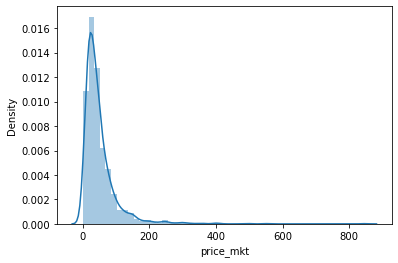

In [84]:
sns.distplot(df_designer_pub.price_mkt, )

In [85]:
with open('100pagesWPUB.pickle', 'wb') as to_write:
    pickle.dump(df, to_write)

In [393]:
import seaborn as sns

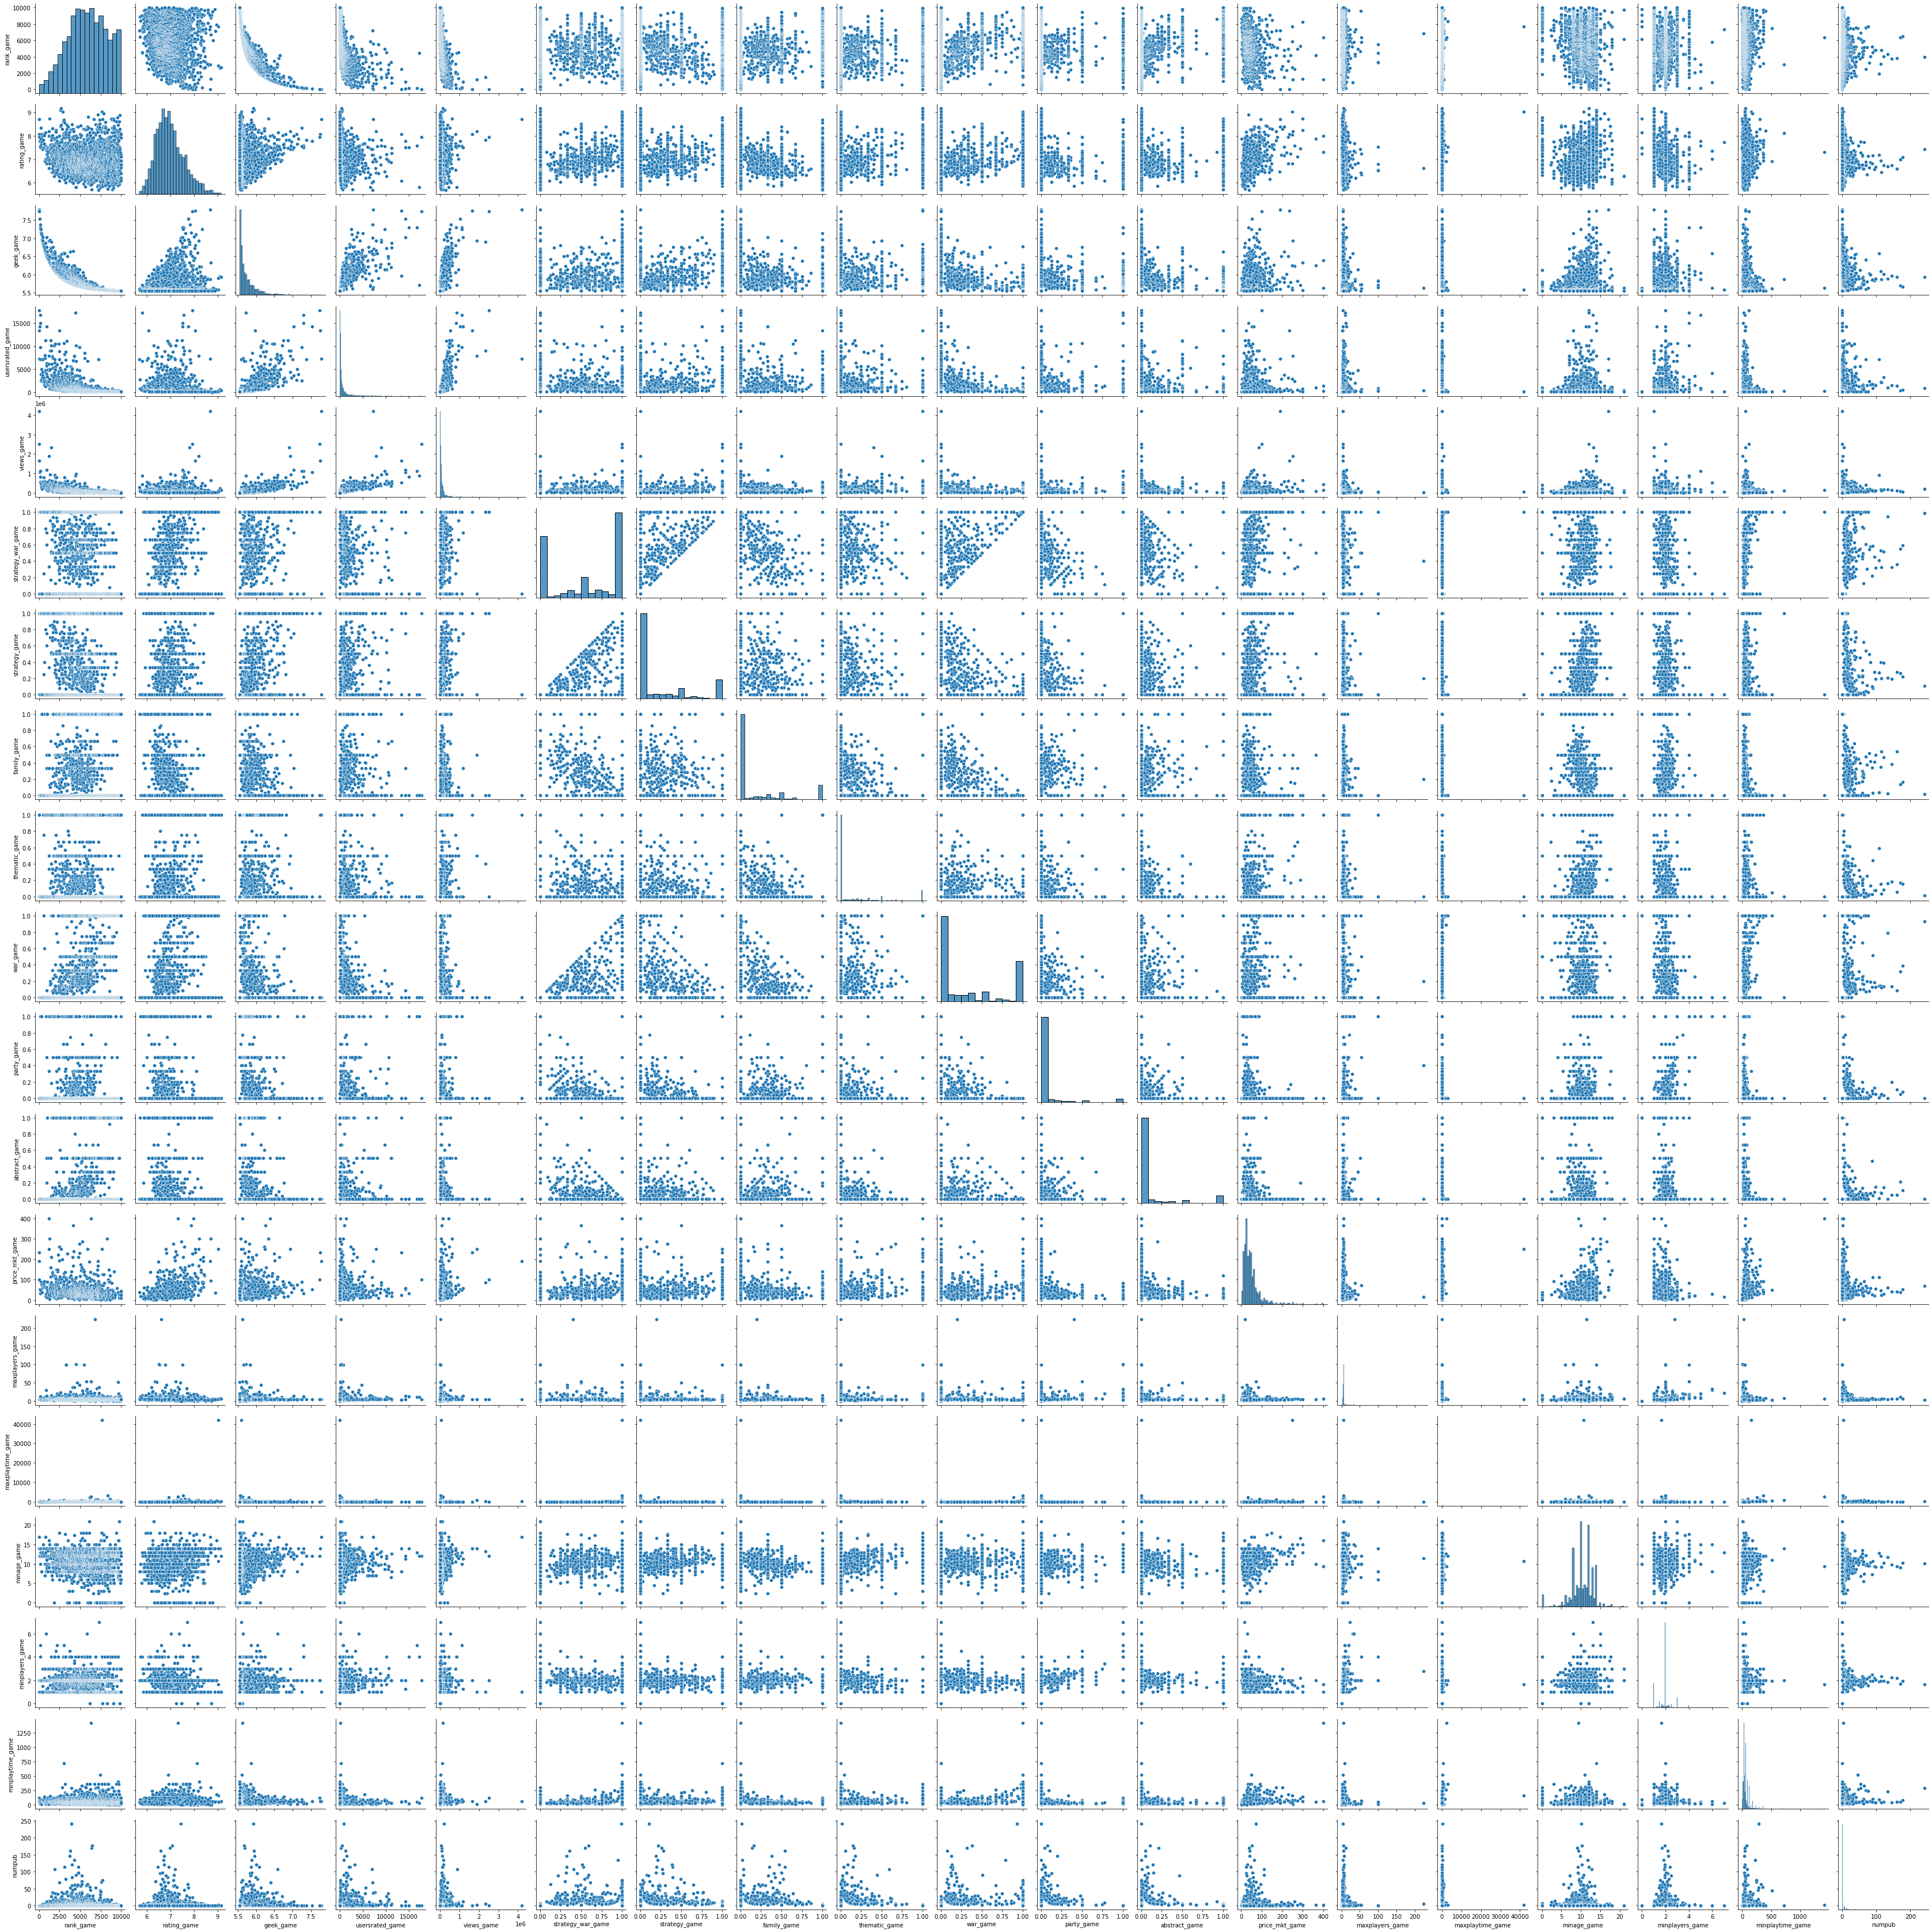

In [394]:
sns.pairplot(publisher_rank_part)

In [395]:
df.to_csv('100_pages_bgg.csv')